In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

import matplotlib as mpl


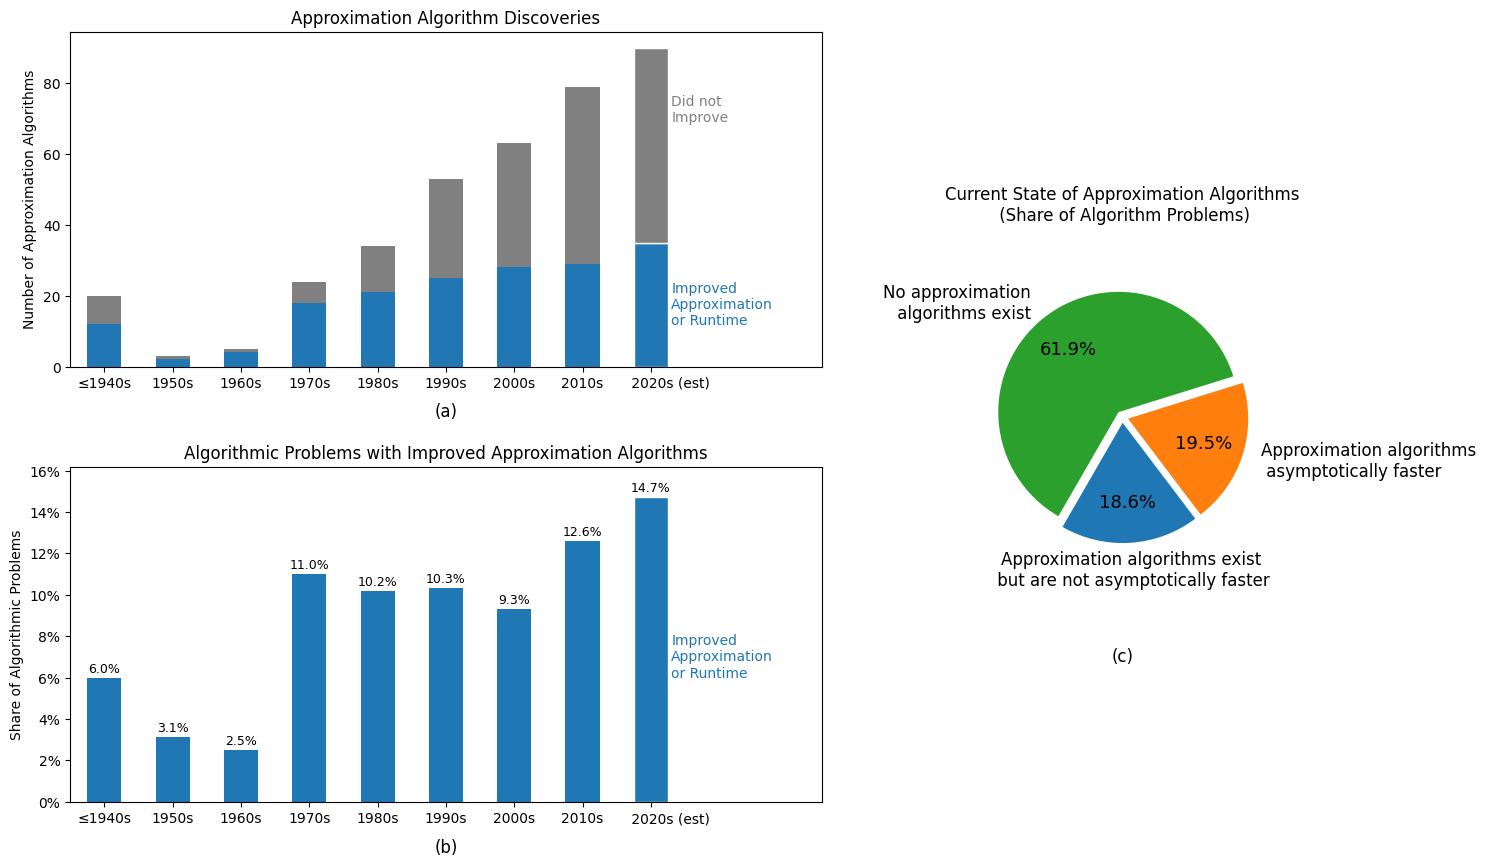

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# First plot: Number of Approximation Algorithms by Decade
data1 = pd.read_csv('datasets/improvement-in-runtime-or-additive-multiplicative-error.csv')
data1.loc[data1['Year'] < 1940, 'Year'] = 1940
data1 = data1.groupby([data1['Year'] // 10 * 10, 'Improvement']).size().unstack().fillna(0)
data1[0], data1[1] = data1[1], data1[0]
data1.loc[2020] = data1.loc[2020] * 2.5

# Second plot: Algorithmic Problems with Improved Approximation Algorithms
data2 = pd.read_csv('datasets/algorithmic-problems-with-improved-approximation-algorithms.csv', index_col=0)

# Third plot: Percentage of Problem Families with or without Asymptotically Faster Approximation Algorithms
data3 = pd.read_csv('datasets/percentage-of-problem-families.csv')
data3 = pd.Series(list(data3['0']), index=['Approximation algorithms exist\n but are not asymptotically faster', 'Approximation algorithms\n asymptotically faster', 'No approximation algorithms exist'])
data3 = data3.sort_values(ascending=False)

# Create figure and subplots
fig = plt.figure(figsize=(16, 10))  # Change layout to 2x2 for the new arrangement
gs = GridSpec(2, 2, figure=fig, width_ratios=[0.6,0.3], wspace=.2)  # Create the GridSpec layout

ax1 = fig.add_subplot(gs[0, 0])  # This spans both columns
# First subplot (Bar chart: Approximation Algorithm Discoveries)
data1.plot(kind='bar', stacked=True, ax=ax1, color=['#2077B4', 'gray'])
ax1.set_xticks(range(len(data1)))
ax1.set_xticklabels(['≤1940s'] + ['         2020s (est)' if year == 2020 else str(year) + 's' for year in data1.index[1:]], rotation=0)
ax1.set_xlabel('')
ax1.set_ylabel('Number of Approximation Algorithms')
ax1.set_title('Approximation Algorithm Discoveries')
ax1.margins(x=0.01)
#ax1.patches[-1].set_hatch('///')
#ax1.patches[8].set_hatch('///')
ax1.patches[-1].set_edgecolor('white')
ax1.patches[8].set_edgecolor('white')
# Remove legend
ax1.legend().remove()

# Shrink the space between the bars
ax1.bar_width = 0.7

# Add custom labels instead of a legend
ax1.text(len(data1) - 0.7, data1.iloc[-1, 1] + data1.iloc[-1, 0] / 2, 'Did not\nImprove', color='gray', ha='left', va='center')
ax1.text(len(data1) - 0.7, data1.iloc[-1, 0] / 2, 'Improved\nApproximation\nor Runtime', color='#2077B4', ha='left', va='center')

# Add label "(a)" below the first plot
ax1.text(0.5, -0.15, "(a)", transform=ax1.transAxes, ha="center", fontsize=12)

# Add padding after the last tick
ax1.set_xlim([-0.5, len(data1) + 1.5])

ax2 = fig.add_subplot(gs[1, 0])  # This spans both columns
# Second subplot (Bar chart: Algorithmic Problems with Improved Approximation Algorithms)
data2['Total Percentage'].plot(kind='bar', ax=ax2)
ax2.set_xticks(range(len(data2)))
ax2.set_xticklabels(['≤1940s'] + ['         2020s (est)' if year == 2020 else f'{year:.0f}s' for year in data2.index[1:]], rotation=0)
ax2.set_xlabel('')
ax2.set_ylabel('Share of Algorithmic Problems')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
ax2.set_title('Algorithmic Problems with Improved Approximation Algorithms')
ax2.margins(x=0.01, y=0.1)
#ax2.patches[-1].set_hatch('///')
ax2.patches[-1].set_edgecolor('white')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() + 0.1),
                       ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Add label "(b)" below the second plot
ax2.text(0.5, -0.15, "(b)", transform=ax2.transAxes, ha="center", fontsize=12)
ax2.set_xlim([-0.5, len(data2) + 1.5])
ax2.text(len(data2) - 0.7, 7, 'Improved\nApproximation\nor Runtime', color='#2077B4', ha='left', va='center')


ax3 = fig.add_subplot(gs[:, 1])  # This spans both rows
# Third subplot (Pie chart: Share of Algorithm Problems)
explode = (0.05, 0.05, 0.05)

# rename index
data3.index = ['No approximation\n algorithms exist', 'Approximation algorithms\n asymptotically faster', 'Approximation algorithms exist\n but are not asymptotically faster']

# data3 reversed
data3 = data3.iloc[::-1]

wedges, texts, percs = ax3.pie(data3, autopct='%1.1f%%', labels=[l for l in data3.index], startangle=-120, explode=explode, radius=0.8,  textprops={'fontsize': 12}  )

ax3.set_title('Current State of Approximation Algorithms\n (Share of Algorithm Problems)')
# Add label "(c)" below the third plot
ax3.text(0.5, -0.15, "(c)", transform=ax3.transAxes, ha="center", fontsize=12)
for i, perc in enumerate(percs):
    # if colors[i] in ['#d70040', '#0058DC']:  # For red and blue, use white text
    # perc.set_color('white')
    perc.set_fontsize(13)

groups = [[0], [1], [2]]
radfraction = 0.05
for group in groups:
    ang = np.deg2rad((wedges[group[-1]].theta2 + wedges[group[0]].theta1) / 2)
    for j in group:
        center = radfraction * wedges[j].r * np.array([np.cos(ang), np.sin(ang)])
        wedges[j].set_center(center)
        texts[j].set_position(np.array(texts[j].get_position()) + center)
        percs[j].set_position(np.array(percs[j].get_position()) + center)
        if group[0] == 0:
            texts[j].set_verticalalignment('center')
            texts[j].set_horizontalalignment('center')
            pos = np.array(texts[j].get_position())
            texts[j].set_position(np.array(texts[j].get_position()) + center)
            texts[j].set_position((pos[0], pos[1] - 0.05))




# Adjust the layout and save the figure
plt.subplots_adjust(hspace=0.3, wspace=0.1)  # Adjust spacing between plots

plt.savefig('figures/figure 1.png', bbox_inches='tight')
plt.show()


/var/folders/lx/jxx7wnmn4q5g51lkvkx6hndc0000gn/T/ipykernel_7838/5381193.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_df['Exact'] = family_df['Approximation Type (additive/multiplicative)'].isnull(
/var/folders/lx/jxx7wnmn4q5g51lkvkx6hndc0000gn/T/ipykernel_7838/5381193.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_df['Constant Factor'] = (family_df['Approximation Factor Class (Mult)'].astype(float) <= 4.5) | \
/var/folders/lx/jxx7wnmn4q5g51lkvkx6hndc0000gn/T/ipykernel_7838/538119

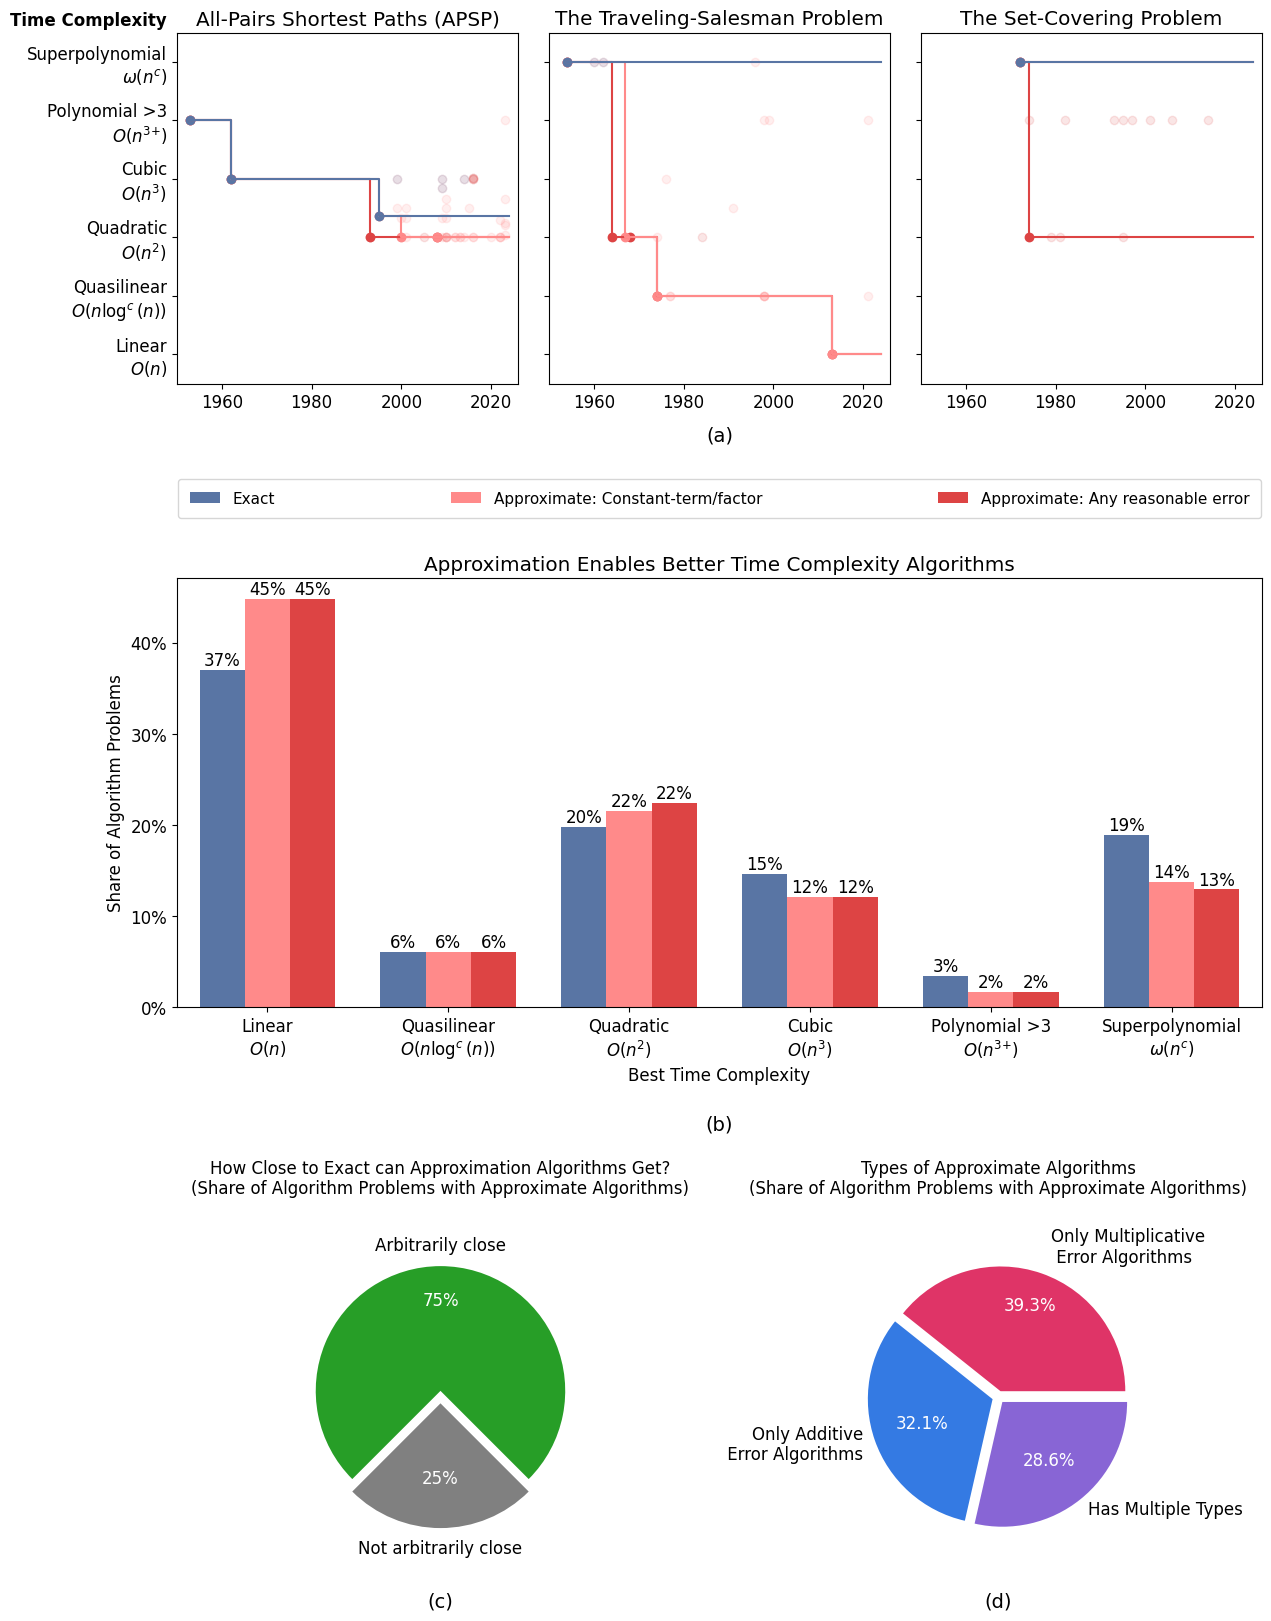

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec

#plt.rcParams['text.usetex'] = True

# Load your dataset for the first plot
df = pd.read_csv('datasets/algorithm-time-complexity-classes.csv')
families = [
    "All-Pairs Shortest Paths (APSP)", "The Traveling-Salesman Problem", "The Set-Covering Problem"]

# Define the fill_best function


def fill_best(df, column="Time Complexity Class"):
    best = []
    last_best = 99999
    for index, row in df.iterrows():
        if row[column] < last_best:
            best.append(True)
            last_best = row[column]
        else:
            best.append(False)
    return best


# Create the GridSpec layout: 2 columns, 3 rows
fig = plt.figure(figsize=(14, 20.25))
gs = GridSpec(3, 6, figure=fig, height_ratios=[0.9, 1.1, 1])

# First row: Create individual subplots for each family (spanning 2 columns per family)
for idx, (family, start_col) in enumerate(zip(families, [0, 2, 4])):
    if idx == 0:
        # First plot without shared y-axis
        ax = fig.add_subplot(gs[0, start_col:start_col+2])
    else:
        # Subsequent plots with shared y-axis
        ax = fig.add_subplot(gs[0, start_col:start_col+2], sharey=ax_first)

    # Define ax_first for sharing
    if idx == 0:
        ax_first = ax  # Store the first axis to share the y-axis

    # Set y-axis label visibility for non-first plots
    if idx != 0:
        ax.tick_params(labelleft=False)

    if idx == 1:
        ax.text(0.5, -0.12, "(a)", transform=ax.transAxes,
                fontsize=14, va='top', ha='center')

    # Each family spans 2 columns
    family_df = df[df['Family Name'] == family]
    family_df['Exact'] = family_df['Approximation Type (additive/multiplicative)'].isnull(
    )
    family_df['Constant Factor'] = (family_df['Approximation Factor Class (Mult)'].astype(float) <= 4.5) | \
                                   (family_df['Approximation Factor Class (Add)'].astype(float) <= 2) | \
        family_df['Exact']
    family_df.sort_values(by=['Year', 'Time Complexity Class'], inplace=True)

    exact = family_df[family_df['Exact']]
    constant_factor = family_df[family_df['Constant Factor']]
    approximate = family_df[family_df['Constant Factor'] == False]
    exact['Best'] = fill_best(exact)
    constant_factor['Best'] = fill_best(constant_factor)
    family_df['Best'] = fill_best(family_df)

    ax.scatter(
        approximate['Year'], approximate['Time Complexity Class'],  color='#DD444422')
    ax.scatter(
        constant_factor['Year'], constant_factor['Time Complexity Class'], color='#ff8a8a22')
    ax.scatter(exact['Year'], exact['Time Complexity Class'],
               color='#5975A422')

    if len(approximate) > 0:
        best_approximate = family_df[family_df['Best']]
        ax.scatter(best_approximate['Year'], best_approximate['Time Complexity Class'],
                   label='Any reasonable error', color='#DD4444')
        last_row = best_approximate.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_approximate = pd.concat(
            [best_approximate, last_row], ignore_index=True)
        ax.step(
            best_approximate['Year'], best_approximate['Time Complexity Class'], where='post', color='#DD4444')

    if len(constant_factor) > 0:
        best_constant_factor = constant_factor[constant_factor['Best']]
        ax.scatter(best_constant_factor['Year'], best_constant_factor['Time Complexity Class'],
                   label='Constant-term/factor', color='#ff8a8a')
        last_row = best_constant_factor.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_constant_factor = pd.concat(
            [best_constant_factor, last_row], ignore_index=True)
        ax.step(best_constant_factor['Year'],
                best_constant_factor['Time Complexity Class'], where='post', color='#ff8a8a')

    if len(exact) > 0:
        best_exact = exact[exact['Best']]
        ax.scatter(
            best_exact['Year'], best_exact['Time Complexity Class'], label='Exact', color='#5975A4')
        last_row = best_exact.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_exact = pd.concat([best_exact, last_row], ignore_index=True)
        ax.step(best_exact['Year'], best_exact['Time Complexity Class'],
                where='post', color='#5975A4')

    ax.set_title(family)

    # Drop the "Year" label from the x-axis
    ax.set_xlabel('')

    ax.set_xlim(1950, 2026)
    ax.set_ylim(2.5, 8.5)

    # Set the custom y-axis label as horizontal and above "Superpolynomial"
    if start_col == 0:
        ax.set_ylabel('')
        ax.annotate('Time Complexity', xy=(
            -0.03, 1.02), xycoords='axes fraction', ha='right', rotation=0, fontweight='bold')

    # Update the y-axis tick labels, splitting before the square brackets and removing them
    ax.set_yticks(np.arange(3, 9, 1), [
        'Linear\n$O(n)$',
        'Quasilinear\n$O(n \log^c(n))$',
        'Quadratic\n$O(n^2)$',
        'Cubic\n$O(n^3)$',
        'Polynomial >3\n$O(n^{\\mathrm{3\\!+}}\\!)$',
        'Superpolynomial\n$\omega(n^c)$'
    ])
# Second plot (grouped bar chart) spanning both columns in the second row
ax2 = fig.add_subplot(gs[1, :])  # This spans both columns
ax2.text(0.5, -0.25, "(b)", transform=ax2.transAxes,
         fontsize=14, va='top', ha='center')

# Load the data for the second plot
data = pd.read_csv('datasets/time-complexity-classes.csv')
count_exact = data["Exact"]
count_constant_factor = data["Constant-term/factor"]
count_approximate = data["Any reasonable error"]
n_families = data["n_families"][0]

# Plot the grouped bars as percentages
ax2.bar(np.arange(1, 9, 1) - 0.25, count_exact.values /
        n_families * 100, width=0.25, label='Exact', color='#5975A4')
ax2.bar(np.arange(1, 9, 1), count_constant_factor.values / n_families * 100,
        width=0.25, label='Approximate: Constant-term/factor', color='#ff8a8a')
ax2.bar(np.arange(1, 9, 1) + 0.25, count_approximate.values / n_families *
        100, width=0.25, label='Approximate: Any reasonable error', color='#DD4444')

# Set xticks and labels, and remove square brackets
ax2.set_xticks(np.arange(3, 9, 1))
ax2.set_xticklabels([
    'Linear\n$O(n)$',
    'Quasilinear\n$O(n \log^c(n))$',
    'Quadratic\n$O(n^2)$',
    'Cubic\n$O(n^3)$',
    'Polynomial >3\n$O(n^{\\mathrm{3\\!+}}\\!)$',
    'Superpolynomial\n$\omega(n^c)$'
])

# Set labels with updated y-axis label and title
ax2.set_xlabel('Best Time Complexity')
ax2.set_ylabel('Share of Algorithm Problems')
ax2.set_xlim(2.5, 8.5)

# Add percentage labels on top of the bars
for bar in ax2.patches:
    yval = bar.get_height()
    if yval > 0:
        ax2.text(bar.get_x() + bar.get_width() / 2.0, yval +
                 0.5, f'{yval:.0f}%', ha='center', fontsize=12)

ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Move legend above the title and compress horizontally
ax2.legend(loc='upper center', bbox_to_anchor=(
    0.5, 1.25), ncol=3, frameon=True, fontsize=11, columnspacing=11.5, borderpad=0.8)

# Update the title as requested
ax2.set_title('Approximation Enables Better Time Complexity Algorithms')

# Third plot (pie chart) in the first column of the third row
ax3 = fig.add_subplot(gs[2, 0:3])
ax3.text(0.5, 0, "(c)", transform=ax3.transAxes,
         fontsize=14, va='top', ha='center')

# Load data for the third plot (How close to optimal)
data3 = pd.read_csv(
    'datasets/how-close-to-optimal-can-approximation-algorithms-get.csv', index_col=0)

# Create the pie chart with exploded slices
explode = (0.1, 0)
colors = ['#279E27', 'gray']
wedges, texts, percs = ax3.pie(
    data3['0'],
    autopct='%1.0f%%',
    labels=[l for l in data3.index],
    colors=colors,
    startangle=-45,
    explode=explode,
    textprops={'fontsize': 12},  # Make text bigger
    radius=0.8
)

# Adjust pie chart margins and positions
ax3.margins(0.15)
groups = [[0], [1]]
radfraction = 0.05
for group in groups:
    ang = np.deg2rad((wedges[group[-1]].theta2 + wedges[group[0]].theta1) / 2)
    for j in group:
        center = radfraction * wedges[j].r * \
            np.array([np.cos(ang), np.sin(ang)])
        wedges[j].set_center(center)
        texts[j].set_position(np.array(texts[j].get_position()) + center)
        percs[j].set_position(np.array(percs[j].get_position()) + center)

# Make sure the numbers are equidistant from the center
for perc in percs:
    perc.set_fontsize(12)  # Make percentages larger
    # if perc.get_text() == "25%":
    perc.set_color("white")  # Change 25% color to white

for text in texts:
    # center text vertically
    text.set_position((text.get_position()[0], text.get_position()[1] - 0.05))
    # center text horizontally
    text.set_horizontalalignment('center')

# Add a title to the third pie chart (without the word "Optimal")
ax3.set_title('How Close to Exact can Approximation Algorithms Get?\n(Share of Algorithm Problems with Approximate Algorithms)', fontsize=12)

# Fourth plot (pie chart) in the second column of the third row
ax4 = fig.add_subplot(gs[2, 3:])
ax4.text(0.5, 0, "(d)", transform=ax4.transAxes,
         fontsize=14, va='top', ha='center')

# Load data for the fourth plot (Types of Approximate Algorithms)
data4 = pd.read_csv(
    'datasets/types-of-approximate-algorithms.csv', index_col=0)

# Update labels and color scheme
labels = ['Only Multiplicative Error Algorithms',
          'Only Additive Error Algorithms', 'Has Multiple Types']
colors = ['#d70040CB', '#0058DCCB', '#6A3ECBCB']
explode = (0.1, 0, 0)

# Create the pie chart with exploded slices
wedges, texts, percs = ax4.pie(
    data4['count'],
    autopct='%1.1f%%',
    labels=labels,
    startangle=0,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 12},  # Increase text size
    radius=0.8
)

# Adjust pie chart margins and positions
ax4.margins(0.1)
groups = [[0], [1], [2]]
radfraction = 0.05
for group in groups:
    ang = np.deg2rad((wedges[group[-1]].theta2 + wedges[group[0]].theta1) / 2)
    for j in group:
        center = radfraction * wedges[j].r * \
            np.array([np.cos(ang), np.sin(ang)])
        wedges[j].set_center(center)
        texts[j].set_position(np.array(texts[j].get_position()) + center)
        percs[j].set_position(np.array(percs[j].get_position()) + center)

# Adjust the color of the percentage text for readability
for i, perc in enumerate(percs):
    # if colors[i] in ['#d70040', '#0058DC']:  # For red and blue, use white text
    perc.set_color('white')
    perc.set_fontsize(12)
    # else:  # For purple, use black text
    # perc.set_color('black')

# if text has 4 words, add a line break after the second word
for text in texts:
    if len(text.get_text().split(' ')) == 4:
        split_text = text.get_text().split(' ')
        split_text[1] += '\n'
        text.set_text(' '.join(split_text))

# Add a title to the fourth pie chart
ax4.set_title('Types of Approximate Algorithms\n(Share of Algorithm Problems with Approximate Algorithms)',
              color='black', fontsize=12, ha='center')

# Adjust the overall layout to prevent overlapping
# plt.tight_layout()
# Increase the space between the plots (you can adjust the value)
plt.subplots_adjust(hspace=0.5)

# Save and display the combined plot
plt.savefig('figures/figure 2.png', bbox_inches='tight')
plt.show()

   Unnamed: 0                     Family Name  \
0           0  The Traveling-Salesman Problem   
1           1  The Traveling-Salesman Problem   

                                Algorithm Name    Year   n = 10^6  \
0  Dantzig-Fulkerson-Johnson (DFJ) formulation  1954.0  2^1000000   
1  Dantzig-Fulkerson-Johnson (DFJ) formulation  2024.0  2^1000000   

   Relative Improvement  
0                     1  
1                     0  


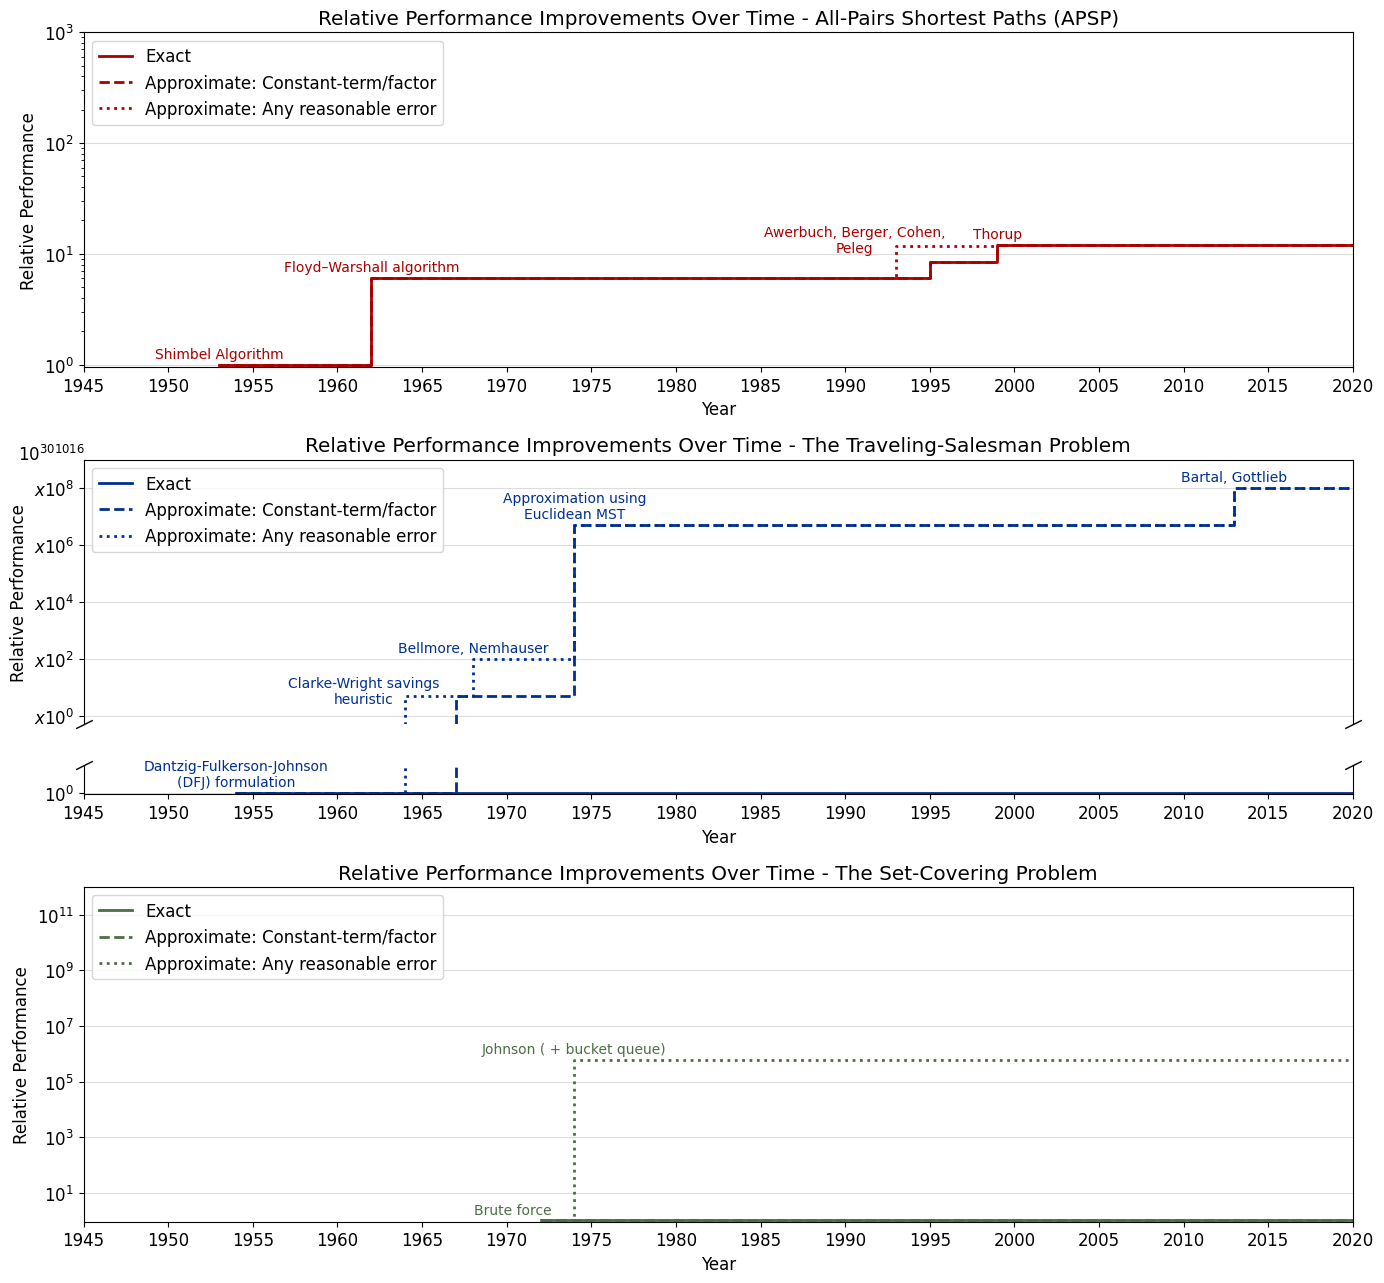

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.ticker import FuncFormatter

# Set up the figure with GridSpec
fig = plt.figure(figsize=(14, 13))
gs = GridSpec(nrows=3, ncols=1, height_ratios=[1, 1, 1])
# gs.update(hspace=0.05) 
colors = [
    ['#AA0000', '#FF033E', '#fd5c63'],
    ['#00308F', '#00FFFF', '#89CFF0'],
    ['#4B6F44', '#7FFF00', '#4FFFB0']
]


# increase fontsize of labels
plt.rcParams.update({'font.size': 12})

# Plot 1 - All-Pairs Shortest Paths (APSP)
def plot_family_data(exact_filtered, constant_factor_filtered, any_error_filtered, label_prefix, color, axis):
   


    axis.step(exact_filtered['Year'], exact_filtered['Relative Improvement'], where='post', label=f'Exact', color=color[0], linewidth=2, linestyle='solid')
    axis.step(constant_factor_filtered['Year'], constant_factor_filtered['Relative Improvement'], where='post', label=f'Constant Factor', color=color[0],
              linewidth=2, linestyle='dashed')
    axis.step(any_error_filtered['Year'], any_error_filtered['Relative Improvement'], where='post', label=f'Any Error', color=color[0],
              linewidth=2, linestyle='dotted')

    for i, row in any_error_filtered.iterrows():
        if i == len(any_error_filtered) - 1:
            continue
        if row['Algorithm Name'] in ["Clarke-Wright savings heuristic", "Awerbuch, Berger, Cohen, Peleg"]:
            text = axis.annotate(row['Algorithm Name'], (row['Year'], row['Relative Improvement']), textcoords="offset points",
                                 xytext=(-30, -5), ha='center', fontsize=10, color=color[0], wrap=True)  # Adjusted position
        elif row['Algorithm Name'] in [ "Brute force"]:
            text = axis.annotate(row['Algorithm Name'], (row['Year'], row['Relative Improvement']), textcoords="offset points",
                                 xytext=(-20, 5), ha='center', fontsize=10, color=color[0], wrap=True)  # Adjusted position
        else:
            text = axis.annotate(row['Algorithm Name'], (row['Year'], row['Relative Improvement']), textcoords="offset points",
                                 xytext=(0, 5), ha='center', fontsize=10, color=color[0], wrap=True)
        
        if row['Algorithm Name'] in ["Approximation using Euclidean MST"]:
            text._get_wrap_line_width = lambda: 200
        else:
            text._get_wrap_line_width = lambda: 200

# Load APSP data
APSP_exact_filtered = pd.read_csv('datasets/APSP_exact_filtered.csv')
APSP_constant_factor_filtered = pd.read_csv('datasets/APSP_constant_factor_filtered.csv')
APSP_any_error_filtered = pd.read_csv('datasets/APSP_any_error_filtered.csv')

# Create axes
ax0 = fig.add_subplot(gs[0])  # APSP

tsp_gs = GridSpecFromSubplotSpec(nrows=2, ncols=1, height_ratios=[0.9, 0.1], subplot_spec=gs[1])

ax1 = fig.add_subplot(tsp_gs[0])  # TSP upper
ax2 = fig.add_subplot(tsp_gs[1], sharex=ax1)  # TSP lower
ax3 = fig.add_subplot(gs[2])  # SCP

# Plot APSP data in the first subplot
plot_family_data(APSP_exact_filtered, APSP_constant_factor_filtered, APSP_any_error_filtered, '', colors[0], ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('Relative Performance')
ax0.set_title('Relative Performance Improvements Over Time - All-Pairs Shortest Paths (APSP)')
ax0.set_xlim(1945, 2020)
ax0.set_ylim(0.95, 1e3)
ax0.set_xticks(np.arange(1945, 2021, 5))
ax0.set_yscale('log')
ax0.margins(x=0, y=0.5)
ax0.grid(True, which='major', axis='y', linestyle='-', color='#DDD')
ax0.legend(['Exact', 'Approximate: Constant-term/factor', 'Approximate: Any reasonable error'], loc='upper left')

# Load TSP data
TSP_exact_filtered = pd.read_csv('datasets/TSP_exact_filtered.csv')
TSP_constant_factor_filtered = pd.read_csv('datasets/TSP_constant_factor_filtered.csv')
TSP_any_error_filtered = pd.read_csv('datasets/TSP_any_error_filtered.csv')

print(TSP_exact_filtered)

# Plot TSP data on both axes
plot_family_data(TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered, '', colors[1], ax1)
plot_family_data(TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered, '', colors[1], ax2)

# Adjust y-limits
ax1.set_ylim(301015.6961225031, 301024.9956639812)
ax2.set_ylim(0.9, 2.9)

base_value = 301016
tick_increments = [301016 + i for i in range(0, 10,2)]
tick_labels = [f"$x10^{i}$" for i in range(0, 10,2)]

ax1.set_yticks(tick_increments)
ax1.set_yticklabels(tick_labels)
ax1.text(-0.025, 1, "$10^{301016}$", transform=ax1.transAxes, ha="center", fontsize=12, fontweight='bold')


# Hide the spines between ax1 and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# hide x-axis ticks
ax1.xaxis.set_ticks_position('none')
ax1.tick_params(labelbottom=False)
ax2.xaxis.tick_bottom()

# Create diagonal lines
d = .5  # Adjust as necessary for the slanted lines
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle='none', color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# Set labels and titles for TSP plot
ax2.set_xlabel('Year')
ax1.set_ylabel('Relative Performance')
ax1.set_title('Relative Performance Improvements Over Time - The Traveling-Salesman Problem')
# ax1.set_yscale('log')
ax2.set_xlim(1945, 2020)
ax2.set_xticks(np.arange(1945, 2021, 5))
ax2.set_yticks([1])
def y_format_log(val, pos):
    log = np.log10(val)
    return f'$10^{{{log:.0f}}}$'
ax2.yaxis.set_major_formatter(plt.FuncFormatter(y_format_log))

ax2.grid(True, which='major', axis='y', linestyle='-', color='#DDD')
ax1.grid(True, which='major', axis='y', linestyle='-', color='#DDD')
ax1.legend(['Exact', 'Approximate: Constant-term/factor', 'Approximate: Any reasonable error'], loc='upper left')

# Load SCP data
SCP_exact_filtered = pd.read_csv('datasets/SCP_exact_filtered.csv')
SCP_constant_factor_filtered = pd.read_csv('datasets/SCP_constant_factor_filtered.csv')
SCP_any_error_filtered = pd.read_csv('datasets/SCP_any_error_filtered.csv')

# Plot SCP data in the fourth subplot
plot_family_data(SCP_exact_filtered, SCP_constant_factor_filtered, SCP_any_error_filtered, 'SCP', colors[2], ax3)
ax3.set_xlabel('Year')
ax3.set_ylabel('Relative Performance')
ax3.set_title('Relative Performance Improvements Over Time - The Set-Covering Problem')
ax3.set_xlim(1945, 2020)
ax3.set_ylim(0.9, 1e12)
ax3.tick_params(axis='y', which='minor', colors='black')
ax3.set_xticks(np.arange(1945, 2021, 5))
ax3.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax3.set_yscale('log')
# ax3.margins(x=0, y=0.5)
ax3.grid(True, which='major', axis='y', linestyle='-', color='#DDD')
ax3.legend(['Exact', 'Approximate: Constant-term/factor', 'Approximate: Any reasonable error'], loc='upper left')

# Custom y-axis formatter for all plots
def y_format(val, pos):
    return f'$10^{{{val:.0f}}}$'

for ax in []:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(y_format))
    ax.set_axisbelow(True)

# Adjust layout
plt.tight_layout()
plt.savefig('figures/figure 3.png', bbox_inches='tight')
plt.show()
